In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# import data with no missing values
df = pd.read_csv('../data/clean_data.csv')

In [33]:
df.head()

,PassengerId,HomePlanet,CabinDeck,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,Transported
0,0001_01,Europa,B,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,F,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,True
2,0003_01,Europa,A,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,False
3,0003_02,Europa,A,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,False
4,0004_01,Earth,F,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,True


PassengerId has two elements in its gggg_pp formatting. gggg represents the group number and pp is the number of people in said group. We can make a new feature (call it GroupSize) to capture this information.

In [34]:
# number of people in the group
# access the pp in gggg_pp, and access the the last digit and convert to integer
df['GroupSize'] = df.PassengerId.str.split("_").str[1].str[1].apply(int)

In [35]:
group_df = df.groupby('GroupSize', as_index=False)['Transported'].value_counts().pivot(index='GroupSize', columns='Transported', values='count')

In [36]:
group_df['transported_ratio'] = group_df[1]/(group_df[1] + group_df[0])

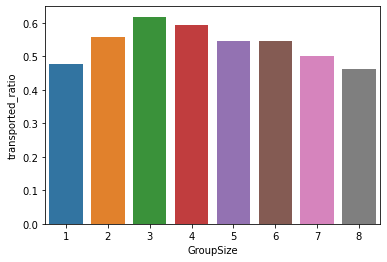

In [37]:
sns.barplot(data=group_df, x=group_df.index, y='transported_ratio');

GroupSize doesn't appear to convey much information. What about whether or not someone is travelling alone? Does being alone affect their chance of being transported?

In [38]:
def alone_or_group(group_size):
    if group_size == 1:
        return 0 # 0 for alone'
    else:
        return 1 # 1 for, yes travel in a group.

df['GroupBool'] = df['GroupSize'].apply(alone_or_group)

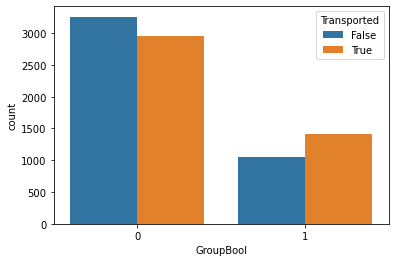

In [39]:
sns.countplot(data=df, x='GroupBool', hue='Transported');

We can see that most people travel alone and people who are in a group are more likely to be transported based on the countplot above. 

In [40]:
df_feat = df.drop('PassengerId', axis=1)

In [41]:
# binary encode
for col in ['CryoSleep', 'VIP', 'Transported']:
    df_feat[col] = df_feat[col].map({True: 1, False: 0})

In [42]:
df_feat = pd.get_dummies(df_feat, drop_first=True)

In [43]:
df_feat.shape

(8693, 23)

In [44]:
trans_col = df_feat.pop('Transported')
df_feat.insert(22, 'Transported', trans_col)

In [45]:
df_feat

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,GroupSize,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,1,...,0,0,0,0,1,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,1,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,1,...,0,0,0,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,1,0,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,1,...,0,0,0,0,0,1,0,0,1,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,1,...,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

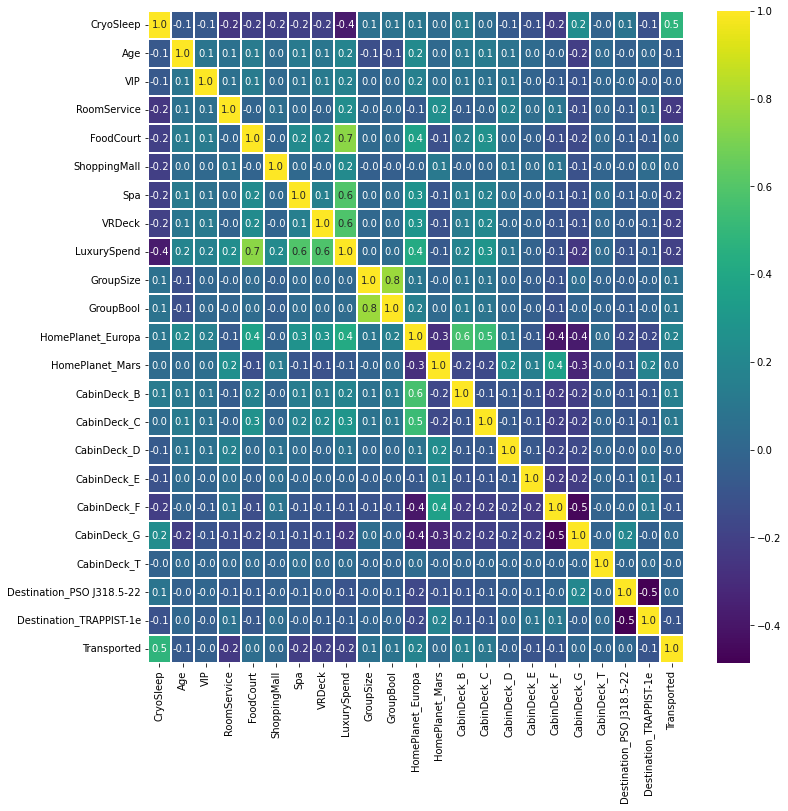

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df_feat.corr(),
            cmap='viridis', 
            linewidths=0.1, 
            annot=True,
            fmt=".1f",     
            annot_kws={"size":10})

LuxurySpend and GroupSize are created based on other columns. They are going to be highly-correlated as a results. I'm going to select GroupBool instead of GroupSize as it is simpler. 

In [47]:

# def age_bins(age):
#     if age < 13:
#         return 0
#     elif age < 19:
#         return 1
#     elif age < 25:
#         return 2
#     elif age < 30:
#         return 3
#     elif age < 40:
#         return 4
#     elif age < 50:
#         return 5
#     else: 
#         return 6

# df_feat['Age'] = df_feat['Age'].apply(age_bins)

In [48]:
# def baby_age(age):
#     if age < 5:
#         return 1
#     else:
#         return 0

# df['babies'] = df['Age'].apply(baby_age)

In [49]:
# sns.countplot(data=df, x='babies', hue='Transported')

In [50]:
df_feat = df_feat.drop(['GroupSize', 'LuxurySpend'], axis=1)

In [53]:
df_feat.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupBool,HomePlanet_Europa,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [54]:
df_feat.to_csv('../data/features.csv', index=False)